In [0]:
# Vincent Meka
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(150, 150, 3))




58892288/58889256 [==============================] - 2s 0us/step








In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)             
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [0]:
conv_base.trainable = False

In [0]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# np arrays
import numpy as np
f1 = np.zeros((5,3))
print(f1)
f1[0:2] = np.array([[1,1,1],[2,2,2]])
print(f1)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [2. 2. 2.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [0]:
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/gdrive/My Drive/Colab Notebooks/Term Project'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

**Train Model**

![alt text](https://drive.google.com/uc?id=1vmSKIhMs6igWcOb_-lfLiP6TGTcrzPEH)

![alt text](https://drive.google.com/uc?id=1HcMGSFt15SZMdnjMUSbDwMKRF3NhnvIs)

---



In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#rescales
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory( 
        train_dir,              # This is the target directory
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator, # augmented images are fed
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator, # No DA
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 991 images belonging to 2 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 - 1010s - loss: 0.4444 - acc: 0.8375 - val_loss: 0.3859 - val_acc: 0.8234
Epoch 2/10
 - 709s - loss: 0.2803 - acc: 0.9030 - val_loss: 0.3209 - val_acc: 0.8618
Epoch 3/10
 - 717s - loss: 0.2234 - acc: 0.9145 - val_loss: 0.2764 - val_acc: 0.8809
Epoch 4/10
 - 715s - loss: 0.1991 - acc: 0.9240 - val_loss: 0.2596 - val_acc: 0.8951
Epoch 5/10
 - 714s - loss: 0.1750 - acc: 0.9345 - val_loss: 0.3083 - val_acc: 0.8678
Epoch 6/10
 - 718s - loss: 0.1619 - acc: 0.9385 - val_loss: 0.2931 - val_acc: 0.8799
Epoch 7/10
 - 714s - loss: 0.1498 - acc: 0.9380 - val_loss: 0.2482 - val_acc: 0.9011
Epoch 8/10
 - 717s - loss: 0.1523 - acc: 0.9460 - val_loss: 0.2353 - val_acc: 0.9072
Epoch 9/10
 - 736s - loss: 0.1548 - acc: 0.9385 - val_loss: 0.2561 - val_acc: 0.8981
Epoch 10/10
 - 737s - loss: 0.1441 - acc: 0.9500 - val_loss: 0.2618 - val_acc: 0.8951


In [0]:
model.save('gun_Pretrained_FE2.h5') # saves model
model.save('/gdrive/My Drive/Colab Notebooks/Term Project/gun_Pretrained_FE2.h5')

**Training Graph**

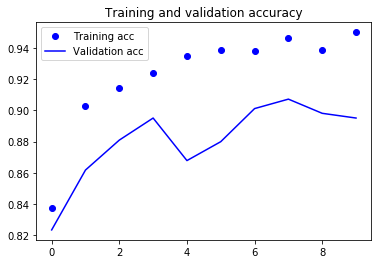

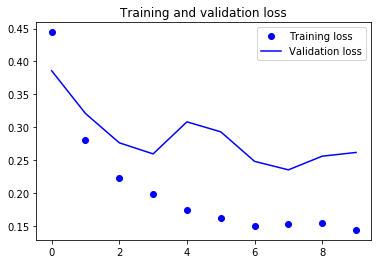

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Model Evaluation**

Found 984 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


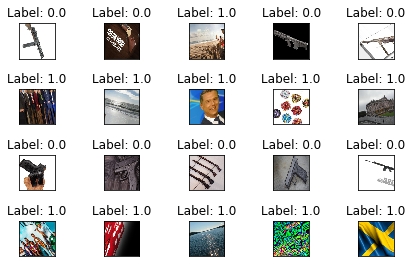

In [0]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# To get the 1st batch
for t_data_batch, t_labels_batch in train_generator:
    print('data batch shape:', t_data_batch.shape)
    print('labels batch shape:', t_labels_batch.shape)
    break

import matplotlib.pyplot as plt
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(t_data_batch[i],interpolation='none')
  plt.title("Label: {}".format(t_labels_batch[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
print("target labels:     ", t_labels_batch)
# present the image to the network
out = model.predict(t_data_batch) 
out = out.reshape(20,)
print("prediected labels: ", out.round())

target labels:      [0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
prediected labels:  [0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [0]:
vali_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=1000,
        class_mode='binary')

for v_data_batch, v_labels_batch in vali_generator:
    print('data batch shape: ', v_data_batch.shape)
    print('label batch shape:', t_labels_batch.shape)
    break

Found 991 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


data batch shape:  (991, 150, 150, 3)
label batch shape: (20,)


In [0]:
# Recreates the same model
new_model = keras.models.load_model('/gdrive/My Drive/Colab Notebooks/Term Project/gun_Pretrained_FE2.h5')
new_model.summary()

loss, acc = new_model.evaluate(v_data_batch, v_labels_batch)
print("Using restored model, validation accuracy: {:5.2f}%".format(100*acc))

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________
991/991 [==============================] - 213s 215ms/step
Using restored model, validation accuracy: 89.51%
